In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'C:\Users\rjhcl\Downloads\house-prices-advanced-regression-techniques\train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:

df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

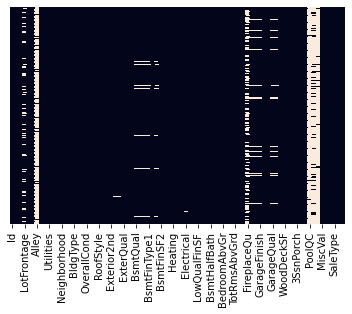

In [6]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)

In [7]:
df.shape

(1460, 81)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [10]:
df.drop(['Alley'] , axis = 1, inplace = True)

In [11]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [12]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [13]:
df.drop(['GarageYrBlt'],axis = 1, inplace = True)

In [14]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [15]:
df.drop(['PoolQC' , 'Fence' , 'MiscFeature'],axis = 1, inplace = True)

In [16]:
df.shape

(1460, 76)

In [17]:
df.drop(['Id'],axis=1,inplace=True)

In [18]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [19]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

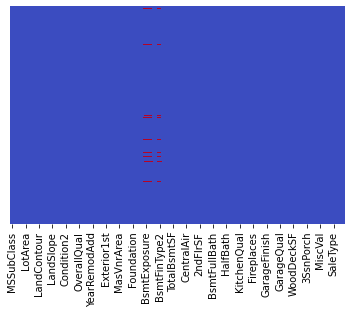

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap = 'coolwarm')

In [21]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

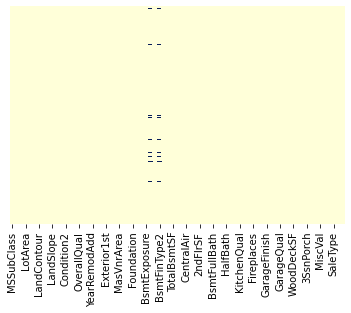

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar =False,cmap = 'YlGnBu')

In [23]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [24]:
df.dropna(inplace=True)

In [25]:
df.shape

(1422, 75)

In [26]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [27]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [28]:
len(columns)

39

In [29]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [30]:
main_df=df.copy()

In [31]:
test_df=pd.read_csv('formulatedtest.csv')

In [32]:
test_df.shape

(1459, 74)

In [33]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [34]:
final_df=pd.concat([df,test_df],axis=0)

In [35]:
final_df.shape

(2881, 75)

In [36]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2881, dtype: float64

In [37]:
final_df.shape

(2881, 75)

In [38]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [39]:
final_df.shape

(2881, 235)

In [40]:

final_df =final_df.loc[:,~final_df.columns.duplicated()]


In [41]:
final_df.shape

(2881, 175)

In [42]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [43]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [44]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\rjhcl\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [45]:
df_Test.shape

(1459, 174)

In [46]:
df_Train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [47]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [48]:
df_Train.shape

(1422, 175)

In [49]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [50]:

import xgboost
classifier=xgboost.XGBRegressor()

In [51]:
import xgboost
regressor=xgboost.XGBRegressor()

In [52]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [53]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [54]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [55]:
from sklearn.model_selection import train_test_split
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   12.2s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  5.5min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [56]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [59]:
regressor.fit(X_train,y_train)

[16:26:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[16:26:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:26:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=0, silent=True, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [61]:
df_Test.shape

(1459, 174)

In [62]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [63]:
y_pred=regressor.predict(df_Test)

In [64]:
y_pred

array([117275.625, 163568.39 , 188306.14 , ..., 181178.69 , 115435.21 ,
       236526.36 ], dtype=float32)

In [66]:
import pandas as pd
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv(r'C:\Users\rjhcl\Downloads\house-prices-advanced-regression-techniques\sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

In [67]:
corr = df_Train.corr()

In [68]:
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
MSSubClass,1.000000,-0.362043,-0.139992,0.036191,-0.060814,0.031093,0.042898,0.023030,-0.068886,-0.065831,...,-0.027530,-0.005706,0.007251,-0.126149,0.042238,0.076647,0.029160,0.073870,-0.042513,-0.026092
LotFrontage,-0.362043,1.000000,0.305044,0.234329,-0.055042,0.115359,0.079438,0.178678,0.214821,0.042224,...,-0.026786,-0.000281,0.026542,0.173737,0.040849,0.077098,0.023039,-0.243815,0.127243,-0.013428
LotArea,-0.139992,0.305044,1.000000,0.104275,-0.006499,0.012959,0.009580,0.103176,0.214007,0.110531,...,0.026573,0.006814,-0.035541,0.090556,-0.001330,0.038406,0.010543,-0.126641,0.013611,0.010247
OverallQual,0.036191,0.234329,0.104275,1.000000,-0.122899,0.571984,0.541770,0.405568,0.215212,-0.071277,...,-0.082369,-0.118907,0.161480,0.235078,-0.030613,0.198328,-0.088936,-0.331986,0.205921,-0.081503
OverallCond,-0.060814,-0.055042,-0.006499,-0.122899,1.000000,-0.389193,0.055335,-0.132775,-0.061424,0.036865,...,0.015787,0.002986,0.066713,-0.136694,-0.017799,-0.065961,-0.028397,0.201058,-0.103613,0.066691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BuiltIn,0.076647,0.077098,0.038406,0.198328,-0.065961,0.195960,0.179177,0.110520,-0.072550,-0.063717,...,-0.035958,0.022731,0.018124,-0.351550,-0.029525,1.000000,-0.017845,-0.150191,-0.015145,-0.036607
CarPort,0.029160,0.023039,0.010543,-0.088936,-0.028397,-0.060674,-0.057085,-0.030470,0.000607,0.078823,...,0.062352,-0.010500,-0.063718,-0.097457,-0.008185,-0.017845,1.000000,-0.041636,-0.045460,-0.010148
Detchd,0.073870,-0.243815,-0.126641,-0.331986,0.201058,-0.491227,-0.307308,-0.182276,-0.206675,-0.024765,...,0.020024,0.032470,-0.068079,-0.820239,-0.068889,-0.150191,-0.041636,1.000000,-0.315749,0.118888
RFn,-0.042513,0.127243,0.013611,0.205921,-0.103613,0.311055,0.188903,0.108129,0.046582,0.004051,...,-0.036088,-0.033109,0.080762,0.303928,0.005395,-0.015145,-0.045460,-0.315749,1.000000,-0.060516


In [69]:
columns = np.full((corr.shape[0],),True, dtype = bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [70]:
selected_columns = df_Train.columns[columns]

In [71]:
columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [72]:
pred.columns=['SalePrice']

In [73]:
temp_df=df_Train['SalePrice'].copy()

In [74]:

temp_df.column=['SalePrice']

In [75]:
df_Train.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\rjhcl\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [76]:
df_Train=pd.concat([df_Train,temp_df],axis=1)

In [77]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [78]:

df_Test=pd.concat([df_Test,pred],axis=1)

In [79]:
df_Train=pd.concat([df_Train,df_Test],axis=0)

In [80]:
df_Train.shape

(2881, 175)

In [81]:
pred.columns=['SalePrice']

In [82]:
temp_df=df_Train['SalePrice'].copy()

In [83]:
temp_df.column=['SalePrice']

In [84]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [85]:
df_Train=pd.concat([df_Train,temp_df],axis=1)

In [86]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [87]:
df_Test=pd.concat([df_Test,pred],axis=1)

In [88]:
df_Train.shape

(2881, 176)

In [89]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice'] 

In [105]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error

from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 50,activation='relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 25,activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 50,activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, epochs = 1000)




Epoch 1/1000
231/231 [==============================] - 0s 1ms/step - loss: 148748.7344 - val_loss: 56392.5312
Epoch 2/1000
231/231 [==============================] - 0s 902us/step - loss: 69708.9609 - val_loss: 55992.5469
Epoch 3/1000
231/231 [==============================] - 0s 920us/step - loss: 66420.4531 - val_loss: 54051.8086
Epoch 4/1000
231/231 [==============================] - 0s 946us/step - loss: 63830.1445 - val_loss: 51383.3438
Epoch 5/1000
231/231 [==============================] - 0s 894us/step - loss: 61071.6680 - val_loss: 50536.6836
Epoch 6/1000
231/231 [==============================] - 0s 911us/step - loss: 58377.6719 - val_loss: 48855.8125
Epoch 7/1000
231/231 [==============================] - 0s 894us/step - loss: 56256.6758 - val_loss: 46313.9258
Epoch 8/1000
231/231 [==============================] - 0s 980us/step - loss: 53387.7930 - val_loss: 43759.5859
Epoch 9/1000
231/231 [==============================] - 0s 924us/step - loss: 51396.6953 - val_loss: 4239

231/231 [==============================] - 0s 1ms/step - loss: 30394.5039 - val_loss: 28401.9766
Epoch 146/1000
231/231 [==============================] - 0s 1ms/step - loss: 30295.6914 - val_loss: 28392.2539
Epoch 147/1000
231/231 [==============================] - 0s 963us/step - loss: 30205.3926 - val_loss: 28162.4961
Epoch 148/1000
231/231 [==============================] - 0s 920us/step - loss: 30145.7598 - val_loss: 28133.2598
Epoch 149/1000
231/231 [==============================] - 0s 916us/step - loss: 30258.8125 - val_loss: 28009.5762
Epoch 150/1000
231/231 [==============================] - 0s 911us/step - loss: 30329.0098 - val_loss: 28409.2207
Epoch 151/1000
231/231 [==============================] - 0s 915us/step - loss: 30117.3203 - val_loss: 28047.6074
Epoch 152/1000
231/231 [==============================] - 0s 882us/step - loss: 30103.4863 - val_loss: 27945.0469
Epoch 153/1000
231/231 [==============================] - 0s 855us/step - loss: 30136.9336 - val_loss: 2794

231/231 [==============================] - 0s 967us/step - loss: 24771.5527 - val_loss: 21371.5684
Epoch 290/1000
231/231 [==============================] - 0s 920us/step - loss: 24536.9863 - val_loss: 20326.3887
Epoch 291/1000
231/231 [==============================] - 0s 902us/step - loss: 24474.2012 - val_loss: 20294.2012
Epoch 292/1000
231/231 [==============================] - 0s 915us/step - loss: 24756.6895 - val_loss: 20172.3301
Epoch 293/1000
231/231 [==============================] - 0s 919us/step - loss: 24782.1270 - val_loss: 20374.1914
Epoch 294/1000
231/231 [==============================] - 0s 934us/step - loss: 24632.4766 - val_loss: 20162.9980
Epoch 295/1000
231/231 [==============================] - 0s 911us/step - loss: 24318.5762 - val_loss: 19988.5957
Epoch 296/1000
231/231 [==============================] - 0s 915us/step - loss: 24522.7578 - val_loss: 20954.9570
Epoch 297/1000
231/231 [==============================] - 0s 868us/step - loss: 24629.6035 - val_loss: 

231/231 [==============================] - 0s 868us/step - loss: 22603.2773 - val_loss: 18661.2188
Epoch 362/1000
231/231 [==============================] - 0s 932us/step - loss: 22858.2812 - val_loss: 18573.1406
Epoch 363/1000
231/231 [==============================] - 0s 916us/step - loss: 22602.0371 - val_loss: 17775.0664
Epoch 364/1000
231/231 [==============================] - 0s 931us/step - loss: 22716.2656 - val_loss: 21598.0996
Epoch 365/1000
231/231 [==============================] - 0s 914us/step - loss: 22561.4707 - val_loss: 18830.9902
Epoch 366/1000
231/231 [==============================] - 0s 904us/step - loss: 22885.0312 - val_loss: 17712.7578
Epoch 367/1000
231/231 [==============================] - 0s 894us/step - loss: 22719.3984 - val_loss: 17954.5293
Epoch 368/1000
231/231 [==============================] - 0s 890us/step - loss: 22390.9688 - val_loss: 17896.3184
Epoch 369/1000
231/231 [==============================] - 0s 877us/step - loss: 22443.9141 - val_loss: 

231/231 [==============================] - 0s 954us/step - loss: 21135.2266 - val_loss: 16391.6387
Epoch 434/1000
231/231 [==============================] - 0s 958us/step - loss: 21131.9551 - val_loss: 16449.7930
Epoch 435/1000
231/231 [==============================] - 0s 1ms/step - loss: 21444.6621 - val_loss: 16425.5391
Epoch 436/1000
231/231 [==============================] - 0s 1ms/step - loss: 20955.6895 - val_loss: 16614.7773
Epoch 437/1000
231/231 [==============================] - 0s 927us/step - loss: 21148.5352 - val_loss: 16890.5410
Epoch 438/1000
231/231 [==============================] - 0s 928us/step - loss: 21325.1836 - val_loss: 16245.8857
Epoch 439/1000
231/231 [==============================] - 0s 893us/step - loss: 21497.6641 - val_loss: 17593.3281
Epoch 440/1000
231/231 [==============================] - 0s 1ms/step - loss: 21272.6562 - val_loss: 18080.4941
Epoch 441/1000
231/231 [==============================] - 0s 2ms/step - loss: 20853.8672 - val_loss: 16323.11

231/231 [==============================] - 0s 902us/step - loss: 19947.7285 - val_loss: 15800.1211
Epoch 578/1000
231/231 [==============================] - 0s 902us/step - loss: 19604.8926 - val_loss: 14746.9355
Epoch 579/1000
231/231 [==============================] - 0s 911us/step - loss: 19256.0879 - val_loss: 16424.9609
Epoch 580/1000
231/231 [==============================] - 0s 959us/step - loss: 19300.5254 - val_loss: 14957.2998
Epoch 581/1000
231/231 [==============================] - 0s 907us/step - loss: 19346.3691 - val_loss: 15490.9883
Epoch 582/1000
231/231 [==============================] - 0s 894us/step - loss: 19380.1934 - val_loss: 16011.6689
Epoch 583/1000
231/231 [==============================] - 0s 829us/step - loss: 19225.0352 - val_loss: 15264.9463
Epoch 584/1000
231/231 [==============================] - 0s 888us/step - loss: 19471.9414 - val_loss: 18392.8672
Epoch 585/1000
231/231 [==============================] - 0s 919us/step - loss: 19183.3887 - val_loss: 

231/231 [==============================] - 0s 920us/step - loss: 18491.7812 - val_loss: 14998.9512
Epoch 650/1000
231/231 [==============================] - 0s 989us/step - loss: 18537.8105 - val_loss: 13915.3770
Epoch 651/1000
231/231 [==============================] - 0s 898us/step - loss: 18722.8242 - val_loss: 13759.7764
Epoch 652/1000
231/231 [==============================] - 0s 888us/step - loss: 18814.2793 - val_loss: 13817.8477
Epoch 653/1000
231/231 [==============================] - 0s 843us/step - loss: 18883.1016 - val_loss: 13971.3359
Epoch 654/1000
231/231 [==============================] - 0s 866us/step - loss: 18629.0254 - val_loss: 16674.8730
Epoch 655/1000
231/231 [==============================] - 0s 924us/step - loss: 18748.4160 - val_loss: 14406.1455
Epoch 656/1000
231/231 [==============================] - 0s 898us/step - loss: 18919.5156 - val_loss: 14049.9160
Epoch 657/1000
231/231 [==============================] - 0s 885us/step - loss: 18431.5781 - val_loss: 

231/231 [==============================] - 0s 918us/step - loss: 17945.6973 - val_loss: 13672.6123
Epoch 722/1000
231/231 [==============================] - 0s 893us/step - loss: 18443.2969 - val_loss: 15523.3047
Epoch 723/1000
231/231 [==============================] - 0s 855us/step - loss: 18070.9902 - val_loss: 14400.0869
Epoch 724/1000
231/231 [==============================] - 0s 912us/step - loss: 18102.4121 - val_loss: 13130.7266
Epoch 725/1000
231/231 [==============================] - 0s 924us/step - loss: 18041.4551 - val_loss: 13053.4189
Epoch 726/1000
231/231 [==============================] - 0s 907us/step - loss: 18027.3008 - val_loss: 13040.5449
Epoch 727/1000
231/231 [==============================] - 0s 933us/step - loss: 18127.7949 - val_loss: 14511.0723
Epoch 728/1000
231/231 [==============================] - 0s 894us/step - loss: 18147.6484 - val_loss: 13191.9209
Epoch 729/1000
231/231 [==============================] - 0s 877us/step - loss: 18262.8164 - val_loss: 

231/231 [==============================] - 0s 946us/step - loss: 18004.0234 - val_loss: 17381.0586
Epoch 794/1000
231/231 [==============================] - 0s 991us/step - loss: 17736.9492 - val_loss: 13388.6768
Epoch 795/1000
231/231 [==============================] - 0s 891us/step - loss: 17701.8398 - val_loss: 13221.0029
Epoch 796/1000
231/231 [==============================] - 0s 927us/step - loss: 17719.2559 - val_loss: 13075.7529
Epoch 797/1000
231/231 [==============================] - 0s 924us/step - loss: 17681.1191 - val_loss: 12850.8213
Epoch 798/1000
231/231 [==============================] - 0s 866us/step - loss: 17274.3574 - val_loss: 12811.6621
Epoch 799/1000
231/231 [==============================] - 0s 920us/step - loss: 17755.9121 - val_loss: 13255.7119
Epoch 800/1000
231/231 [==============================] - 0s 898us/step - loss: 17423.1367 - val_loss: 15686.8770
Epoch 801/1000
231/231 [==============================] - 0s 872us/step - loss: 17457.2168 - val_loss: 

Epoch 937/1000
231/231 [==============================] - 0s 907us/step - loss: 16804.4180 - val_loss: 12858.3154
Epoch 938/1000
231/231 [==============================] - 0s 889us/step - loss: 16740.4102 - val_loss: 12991.2803
Epoch 939/1000
231/231 [==============================] - 0s 872us/step - loss: 16955.5684 - val_loss: 15109.1523
Epoch 940/1000
231/231 [==============================] - 0s 905us/step - loss: 16786.5898 - val_loss: 14663.2549
Epoch 941/1000
231/231 [==============================] - 0s 898us/step - loss: 17149.7754 - val_loss: 12829.4043
Epoch 942/1000
231/231 [==============================] - 0s 933us/step - loss: 16822.6387 - val_loss: 14289.3428
Epoch 943/1000
231/231 [==============================] - 0s 898us/step - loss: 16478.5352 - val_loss: 13247.2363
Epoch 944/1000
231/231 [==============================] - 0s 903us/step - loss: 16699.8184 - val_loss: 13390.7812
Epoch 945/1000
231/231 [==============================] - 0s 876us/step - loss: 16768.78

In [104]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))